# Solving Boundary Value Problems Using Shooting Method And Python

## Introduction

The shooting method is developed with the aim of converting the boundary value problem to an equivalent initial value problem. While solving the initial value problem, we start with an initial value and march forward in time to get to the solution. However, boundary value problems cannot be solved this way as there are not enough initial value conditions to solve the equation to get a unique solution. Shooting methods are developed to circumvent this problem. 

The name shooting method comes from the game of target shooting. As in the game, we shoot at the target and see how close to the target we can hit. Based on the errors, we then adjust our aim and shoot again with the hope that it will hit the target. 

## The Shooting Method

Let us consider the following boundary value problem:

$$
\frac{d^{2}y}{dt^{2}} = f(t, y, \frac{dy}{dt})
$$

on a $t \in [a,b]$ with the boundary conditions $y(a) = \alpha$ and $y(b) = \beta$.

To solve this problem using the initial value problem approach, we have to rewrite the above the differential equation as follows:

$$
\frac{dy}{dt} = z
$$

Along with this condition, we need $y(a) = \alpha$, which is given. We rewrite the above equation using the above relation.

$$
\frac{dz}{dt} = f(t, y, z)
$$

However, to solve the above equation we need to know $z(a) = \kappa$, which is unknown. Our goal here is to find the value of $\kappa$ so that the boundary condition $y(b) = \beta$ is satisfied.
To accomplish that we define a function $F(\kappa)$

$$F(\kappa) = y(b) - \beta$$

Where we have to find the value of $\kappa$ so that $F(\kappa) = 0$. Notice that the above step is a root finding problem.  Once we realize this, we can use a systematic methods to search for the best guess using root finding algorithms in Python.

To summarise, shooting method is performed using the following three steps.

* Start the process by guessing $z(a) = \kappa$ along with $y(a) = \alpha$ which is given. So, we have turned the above boundary value problem into an initial value problem. This is the aim step.

* Using the initial conditions in the previous step, we integrate the differential equation till $y(b) = \beta$. This is the shooting step.

* Now we compare the values of $y(b)$ and $y(\beta)$.  Usually our initial guess is not good, and $y(b) \not = \beta$. However, what we want is $y(b) = \beta$. Therefore, we adjust our initial guesses and repeat. Until the error is acceptable, we can stop. This is the iterative root-finding step. 

## Example 1

We are going out to launch a rocket, and let $y(t)$
is the altitude (meters from the surface) of the rocket at time t. We know the gravity $g=9.8 m/s^{2}$. If we want to have the rocket at $50 m$ off the ground after $5 s$ after launching, what should be the velocity at launching? (we ignore the drag of the air resistance).

Let us write the problem in terms of a boundary value problem. Our differential equation must be

$$
\frac{d^{2}y}{dt^{2}} = -g
$$

with the boundary conditions $y(0) = 0$ and $y(5) = 50$. Rember, we want to answer the question, what’s the $y^{'}(0)$ at launching?

To solve the using shooting method, we have to reduce the order of the function. Therefore, we reduce the second-order ODE to two coupled first order ODEs as shown.

$$
\frac{dy}{dt} = v
$$

and 

$$
\frac{dv}{dt} = -g
$$

\begin{equation}
\frac{d}{dt} 
\begin{bmatrix}
y(t) \\
v(t)
\end{bmatrix} = 
\begin{bmatrix}
0 & 1\\
0 & -g/v\\
\end{bmatrix}
\begin{bmatrix}
y(t) \\
v(t)
\end{bmatrix}
\end{equation}

To solve this problem using the shooting method we want $y^{'}(0)$.


## Python Code

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
plt.style.use('seaborn')
%matplotlib inline

In [28]:
def f(t,s):
    return np.dot(np.array([[0,1],[0,-9.8/s[1]]]),s)

In [29]:
t_span = np.linspace(0,5,100)

## Guess-1
Let us start with an initial guess for $v_{0} = 25 ms^{-1}$.

In [33]:
y0 = 0
v0 = 25
t_eval = np.linspace(0,5,10)
solution_1 = solve_ivp(f, [0,5], [y0,v0],t_eval=t_eval)
#print(solution)

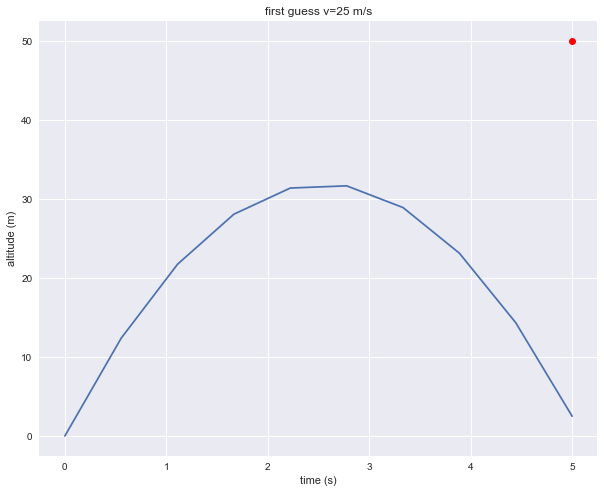

In [34]:
plt.figure(figsize = (10, 8))
plt.plot(solution_1.t, solution_1.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'first guess v={v0} m/s')
plt.show()

The red dot in the figure is the target we want to hit. However, from the figure its evident that our first guess is too small. 

## Guess-2

Now, lets increase our velocity to $v_{0} = 40 ms^{-1}$.

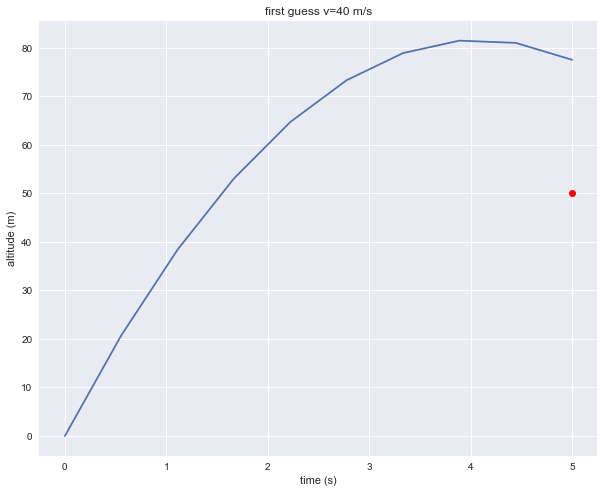

In [35]:
v0 = 40
t_eval = np.linspace(0,5,10)
solution_2 = solve_ivp(f, [0,5], [y0,v0],t_eval=t_eval)
plt.figure(figsize = (10, 8))
plt.plot(solution_2.t, solution_2.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'first guess v={v0} m/s')
plt.show()

This time we have overestimated the velocity. This demonstrates that random guess is not an ideal way to find the result. The better way is to use the root finding algorithm. We use Python's fsolve to find the root. The code is given below.

In [40]:
from scipy.optimize import fsolve

def objective(v0):
    solution = solve_ivp(f,[0,5],[y0,v0],t_eval=t_eval)
    y = solution.y[0]
    return y[-1] - 50

v0[0] = fsolve(objective, 10)
#print(v0)

[34.5]


/Users/shreyas/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


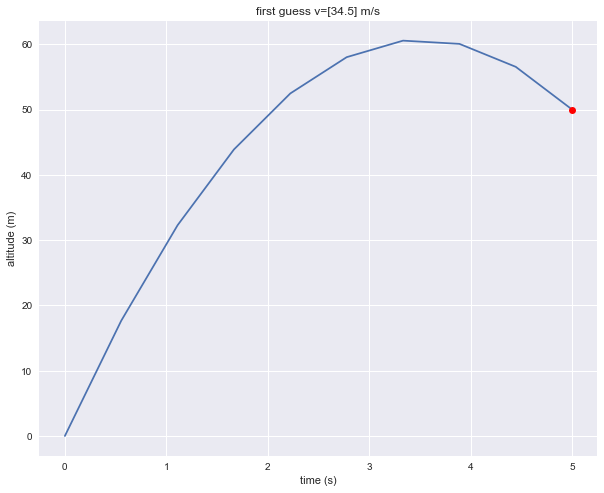

In [45]:
solution_3 = solve_ivp(f,[0,5],[y0,v0],t_eval=t_eval)

plt.figure(figsize = (10, 8))
plt.plot(solution_3.t, solution_3.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'first guess v={v0} m/s')
plt.show()